In [147]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chi2_contingency
import seaborn as sns

In [174]:
df = pd.read_pickle('pv_apps.pkl')
df.columns.values

array(['application id', 'preceding id', 'superceding id',
       'matched csi application number', 'application status', 'utility',
       'service city', 'service zip', 'service county', 'technology type',
       'system size dc', 'system size ac', 'storage capacity (kwh)',
       'storage size (kw ac)', 'inverter size (kw ac)', 'tilt', 'azimuth',
       'mounting method', 'tracking', 'customer sector',
       'app received date', 'app complete date', 'app approved date',
       'decommissioned date', 'self installer', 'installer name',
       'installer phone', 'installer city', 'installer state',
       'installer zip', 'cslb number', 'third party owned',
       'third party owned type', 'third party name', 'pace financed',
       'pace financier', 'electric vehicle', 'electric vehicle count',
       'system output monitoring', 'system output reports to vendor?',
       'system output monitoring provider', 'total system cost',
       'itc cost basis', 'cost/watt', 'nem tariff',
   

In [149]:
df['time_to_approval'] = df['time_to_approval'].astype(str).str.replace('days','')
df['time_to_approval'] = df['time_to_approval'].str.replace('NaT','0')
df['time_to_approval'] = pd.to_numeric(df['time_to_approval'])

In [150]:
df = df[df['time_to_approval'] < 1000]
df = df[df['time_to_approval'] > 0]

<AxesSubplot:xlabel='time_to_approval', ylabel='Density'>

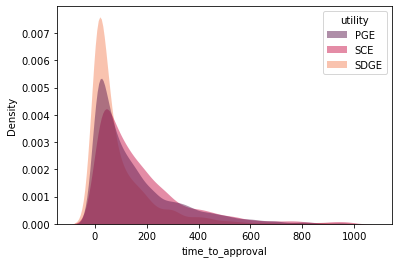

In [151]:
sns.kdeplot(
   data=df, x="time_to_approval", hue="utility",
   fill=True, common_norm=False, palette="rocket",
   alpha=.5, linewidth=0,
)

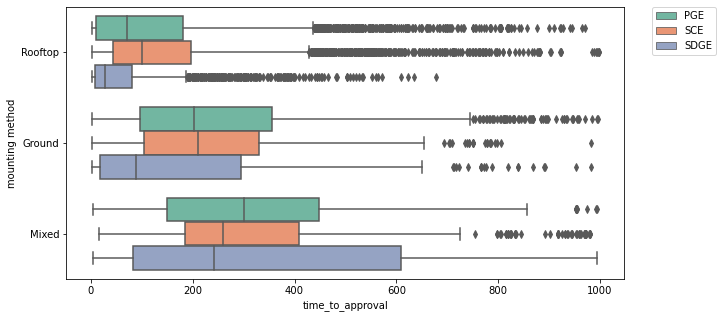

In [160]:
sns.boxplot(x='time_to_approval',y='mounting method',hue='utility', data=df, orient="h", palette="Set2")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [112]:
d = df.groupby(['utility','mounting method'])['system size dc'].mean()

In [114]:
df.pivot_table(index="app approved date", columns="mounting method", values="system size dc")

mounting method,Ground,Mixed,Rooftop
app approved date,,,
2001-03-22,NaN,NaN,3.061224
2001-06-26,NaN,NaN,8.979592
2001-07-02,NaN,NaN,1.632653
2001-09-10,NaN,NaN,4.081633
2001-09-21,NaN,NaN,8.622449
...,...,...,...
2020-09-25,223.2530,NaN,89.234292
2020-09-26,NaN,NaN,42.400510
2020-09-28,48.4605,NaN,201.582136


In [136]:
mixed_mount = df[df['mounting method'] == 'Mixed']['time_to_approval'].sample(2000, replace=True)

In [137]:
not_mixed = df[df['mounting method'] != 'Mixed']['time_to_approval'].sample(2000, replace=True)

In [138]:
obs = np.array([mixed_mount,not_mixed])

In [140]:
chi2, p, dof, ex = chi2_contingency(obs)

In [141]:
p

0.0

In [170]:
inv_oem = list(df.columns.values[-28 :])

In [179]:
oem_df = df.groupby(by=inv_oem)

In [180]:
oem_df.ngroups

2

inverter manufacturer 1
ABB                           136.334286
ABB/POWER-ONE                 171.885714
ADVANCED ENERGY               154.322917
ADVANCED ENERGY, INC.          89.000000
AE                            313.000000
                                 ...    
Xslent Energy Technologies     93.500000
YINGLI SOLAR                  168.000000
Yaskawa Solectria Solar       313.771930
Yes! Solar                    206.000000
altenergy power systems        29.000000
Name: time_to_approval, Length: 235, dtype: float64